<a href="https://colab.research.google.com/github/zelaza/DALL-E/blob/master/testy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Clone repos and install requirements

In [ ]:
!git clone https://github.com/CompVis/latent-diffusion.git
!git clone https://github.com/CompVis/taming-transformers
!pip install -e ./taming-transformers
!pip install ipywidgets omegaconf>=2.0.0 pytorch-lightning>=1.0.8 torch-fidelity einops

import sys
sys.path.append(".")
sys.path.append('./taming-transformers')
from taming.models import vqgan # checking correct import from taming

Cloning into 'latent-diffusion'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 171 (delta 45), reused 163 (delta 41), pack-reused 0
Receiving objects: 100% (171/171), 17.88 MiB | 5.73 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Cloning into 'taming-transformers'...
remote: Enumerating objects: 1297, done.
remote: Counting objects: 100% (487/487), done.
remote: Compressing objects: 100% (466/466), done.
remote: Total 1297 (delta 32), reused 459 (delta 19), pack-reused 810
Receiving objects: 100% (1297/1297), 409.22 MiB | 23.08 MiB/s, done.
Resolving deltas: 100% (242/242), done.
Obtaining file:///content/taming-transformers
  Running setup.py develop for taming-transformers


2. Define the Task (currently only superresolution is available, other tasks are coming soon)



In [ ]:
%cd latent-diffusion
import ipywidgets as widgets
from IPython.display import display

mode = widgets.Select(options=['superresolution'],
    value='superresolution', description='Task:')
display(mode)

/content/latent-diffusion/latent-diffusion


Select(description='Task:', options=('superresolution',), value='superresolution')

3. Download model checkpoint ( takes ~ 3 Min) and load model


In [ ]:
from notebook_helpers import get_model
model = get_model(mode.value)

  0%|          | 0/1908 [00:00<?, ?it/s]

  0%|          | 0/2039822129 [00:00<?, ?it/s]

Loading model from logs/diffusion/superresolution_bsr/checkpoints/last.ckpt/?dl=1
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 113.62 M params.
Keeping EMAs of 308.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


4. Optional step: Upload your own conditioning image for superresolution (height and width have to take values in [128, 192, 256])

In [ ]:
from notebook_helpers import get_custom_cond
get_custom_cond(mode.value)

Saving fox (1).jpg to fox (1).jpg


4. Select conditioning from available examples or the uploaded custom conditioning

In [ ]:
from notebook_helpers import get_cond_options, get_cond
dir, options = get_cond_options(mode.value)
cond_choice = widgets.RadioButtons(
        options=options,
        description='Select conditioning:',
        disabled=False
    )
display(cond_choice)

RadioButtons(description='Select conditioning:', options=('custom_crop_fox.png', 'custom_fox (1).jpg', 'sample…

5. Run Model

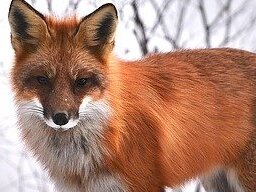

Plotting: Switched to EMA weights
Sampling with eta = 1.0; steps: 100


/content/latent-diffusion/ldm/models/diffusion/ddim.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('betas', to_torch(self.model.betas))
/content/latent-diffusion/ldm/models/diffusion/ddim.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('alphas_cumprod', to_torch(alphas_cumprod))
/content/latent-diffusion/ldm/models/diffusion/ddim.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('alphas_cumprod_prev', to_torch(self.model.alphas_cumprod_prev))
/content/latent-diff

Data shape for DDIM sampling is (1, 3, 192, 256), eta 1.0
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|██████████| 100/100 [03:44<00:00,  2.25s/it]


Plotting: Restored training weights


In [ ]:
from notebook_helpers import run
import os
custom_steps = 100
cond_choice_path = os.path.join(dir, cond_choice.value)
logs = run(model["model"], cond_choice_path, mode.value, custom_steps)

6. Display Sample

(1, 768, 1024, 3)


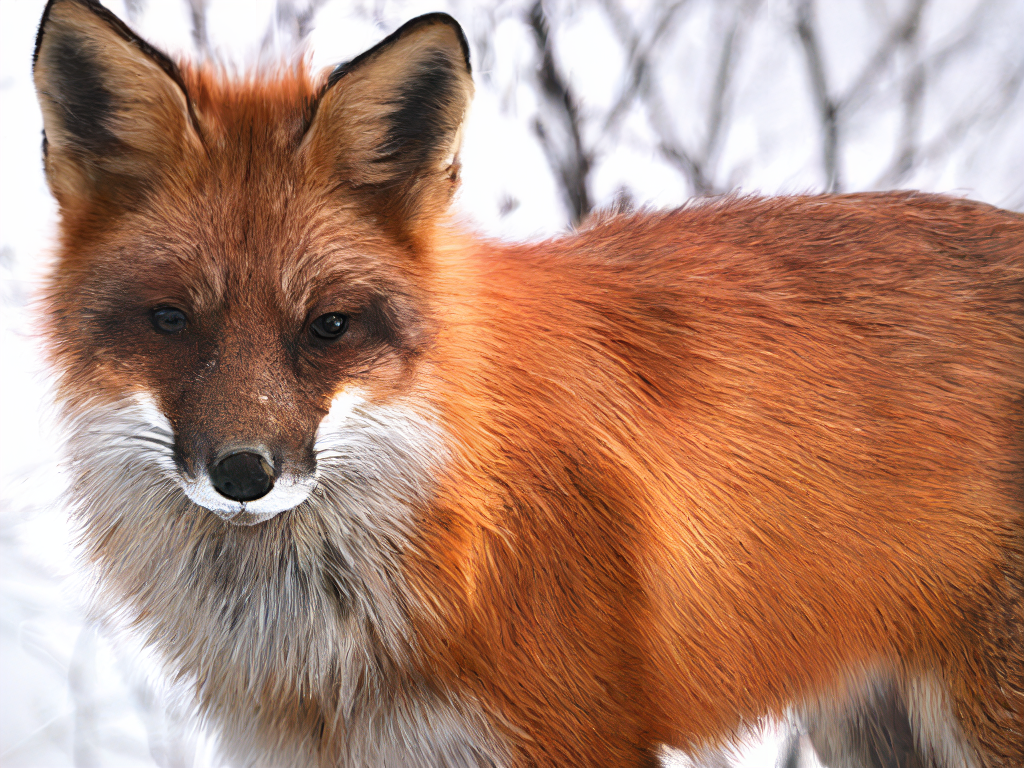

In [ ]:
import torch
import numpy as np
import IPython.display as d
from PIL import Image

sample = logs["sample"]
sample = sample.detach().cpu()
sample = torch.clamp(sample, -1., 1.)
sample = (sample + 1.) / 2. * 255
sample = sample.numpy().astype(np.uint8)
sample = np.transpose(sample, (0, 2, 3, 1))
print(sample.shape)
a = Image.fromarray(sample[0])
display(a)
